In [1]:
import networkx as nx #import networkx library
import matplotlib.pyplot as plt #import matplotlib library

n=20 #Number of nodes
m=2 #Number of initial links, calculated by n/5
l=round(n/2) #Number of node divided by 2 and round up to an integer 
G=nx.stochastic_block_model([l, l], [[0.25, 0.05], [0.05, 0.25]]) #create a stochastic block model graph with [l,l] size and the eddge density as [0.25, 0.05] and [0.05, 0.25] 
#G=nx.barabasi_albert_graph(n, m) #create a barabasi groph with n nodes and m initial links

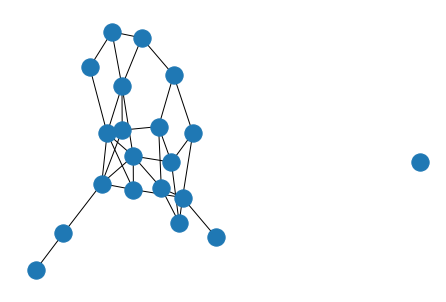

In [2]:
nx.draw(G) #show the graph connections

In [594]:
#check the amount of square connection prior to  any changes
f=[]
for i in range(n):
    c=0
    for j in range(n):
        for k in range(n):
            for l in range(n): #run through every node numbers as i, j, k  and l
                if(i!=j and j!=k and k!=l and l!=i and l!=j and i!=k and G.get_edge_data(i, j, default=0)!=0 and G.get_edge_data(j, k, default=0)!=0 and G.get_edge_data(k, l, default=0)!=0 and G.get_edge_data(l, i, default=0)!=0):
                    c=c+1 #check if i, j, k and l is not the same node number and that they are connected as a square
    f.append(c)
sum(f)

16

In [595]:
print(sum(f)/8) #divide by 8 to cancel out repetitive combinations

2.0


In [596]:
import math
E=5 #set epsilon constant
p1=1/(1+(math.e**E)) #calculate p1 constant from the equation p1=1/(1+e^E)
print(p1)

0.006692850924284857


In [597]:
import random
for i in range(n):
    for j in range(n): #run through every node numbers as i and j 
        x = random.random() #randomize a number
        if(x<p1): #if the randomize number is less than the p1 constant, initiated a flip on the connection between node i and j
            if(G.get_edge_data(i, j, default=0)!=0 and i<j):
                G.remove_edge(i, j) #if there was a connection, remove the connection between i,j
            elif(G.get_edge_data(i, j, default=0)==0 and i<j):
                G.add_edge(i, j) #if there was not a connection, create the connection between i,j

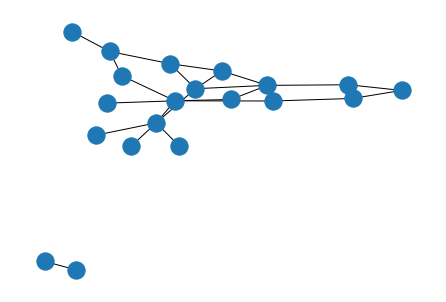

In [598]:
nx.draw(G) #show the graph connections after flipping

In [599]:
#check the amount of square connection after flipping
f=[]
for i in range(n):
    c=0
    for j in range(n):
        for k in range(n):
            for l in range(n):
                if(i!=j and j!=k and k!=l and l!=i and l!=j and i!=k and G.get_edge_data(i, j, default=0)!=0 and G.get_edge_data(j, k, default=0)!=0 and G.get_edge_data(k, l, default=0)!=0 and G.get_edge_data(l, i, default=0)!=0):
                    c=c+1
    f.append(c)
sum(f)

24

In [600]:
print(sum(f)/8) #divide by 8 to cancel out repetitive combinations

3.0
